In [1]:
import sys
sys.path.append('../scripts')
from ChangePointDetector import ChangePointDetector

In [3]:
detector = ChangePointDetector()
detector.set_data('../data/Langevin_1D.txt')
detector.set_truth('../data/Langevin_1D_change_points.txt')
detector.compute_change_points()
detector.compute_f1_stats()
recall, precision, f1 = detector.get_f1_stats()
recall, precision, f1


(0.7929850746268656, 0.35597989949748743, 0.4913757225433526)

In [7]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
quantile_floor = 78
quantile_ceiling = 98
quantile_step = 10
quantile_count = int((quantile_ceiling - quantile_floor) / quantile_step)
window_floor = 150
window_ceiling = 300
window_step = 75
window_count = int((window_ceiling - window_floor) / window_step)
recall_matrix = np.empty((window_count, quantile_count))
f1_matrix = np.empty((window_count, quantile_count))

method='wasserstein'

for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
    # save the data each time we make it through a quantile setting
    np.save('wass_f1_mat.npy', f1_matrix)
    np.save('wass_recall_mat.npy', recall_matrix)
    for j, w in enumerate(range(window_floor, window_ceiling, window_step)):
        detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
        detector.compute_f1_stats()
        recall_matrix[i,j] = detector.get_f1_stats()[0]
        f1_matrix[i,j] = detector.get_f1_stats()[2]



(2, 2)


0it [00:00, ?it/s]

1it [01:10, 70.07s/it]

2it [02:03, 60.30s/it]

2it [02:03, 61.76s/it]

Text(0.5, 23.52222222222222, 'Window Size')

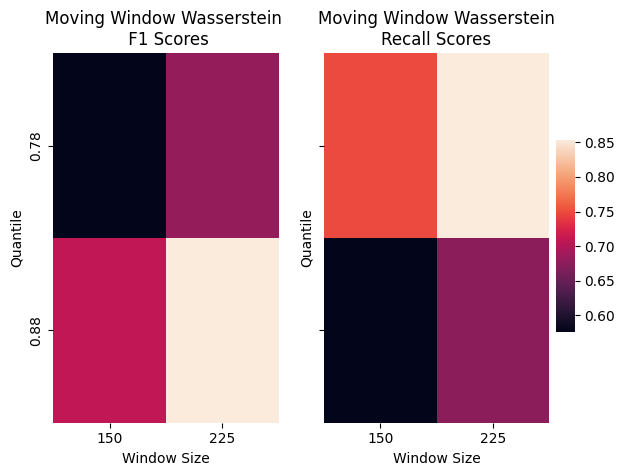

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Plot F1
ax1.set_title("Moving Window Wasserstein \n F1 Scores")
sns.heatmap(f1_matrix, ax=ax1, cbar_ax=cbar_ax)
ax1.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax1.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax1.set_ylabel("Quantile")
ax1.set_xlabel("Window Size")

# Plot Recall
ax2.set_title("Moving Window Wasserstein\nRecall Scores")
sns.heatmap(recall_matrix, ax=ax2, cbar_ax=cbar_ax)
ax2.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax2.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax2.set_ylabel("Quantile")
ax2.set_xlabel("Window Size")
